# Imports

In [1]:
from model_builder import ModelBuilder
import json
import warnings
warnings.filterwarnings("ignore")

/Users/yashv/Desktop/UPenn_Courses/Labs/CSS/team-process-map/team_process_map/lib/python3.8/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/yashv/Desktop/UPenn_Courses/Labs/CSS/team-process-map/team_process_map/lib/python3.8/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecat

In [2]:
with open("config.json", "rb") as json_file:
    config = json.load(json_file)
config

{'juries_conv_cols_to_ignore': ['conversation_num',
  'batch_num',
  'round_num',
  'speaker_hash',
  'timestamp',
  'majority_pct',
  'num_flipped',
  'flipped_pct',
  'num_votes']}

# Juries Model

In [3]:
juries_model = ModelBuilder(config_path="config.json", output_dir="output/")

In [4]:
juries_model.select_target(target=juries_model.juries_conv_complete["majority_pct"])

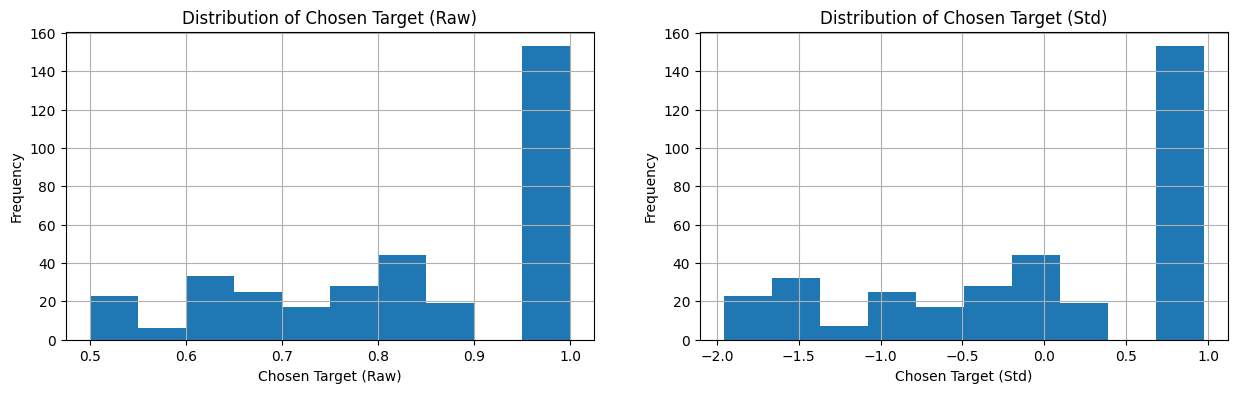

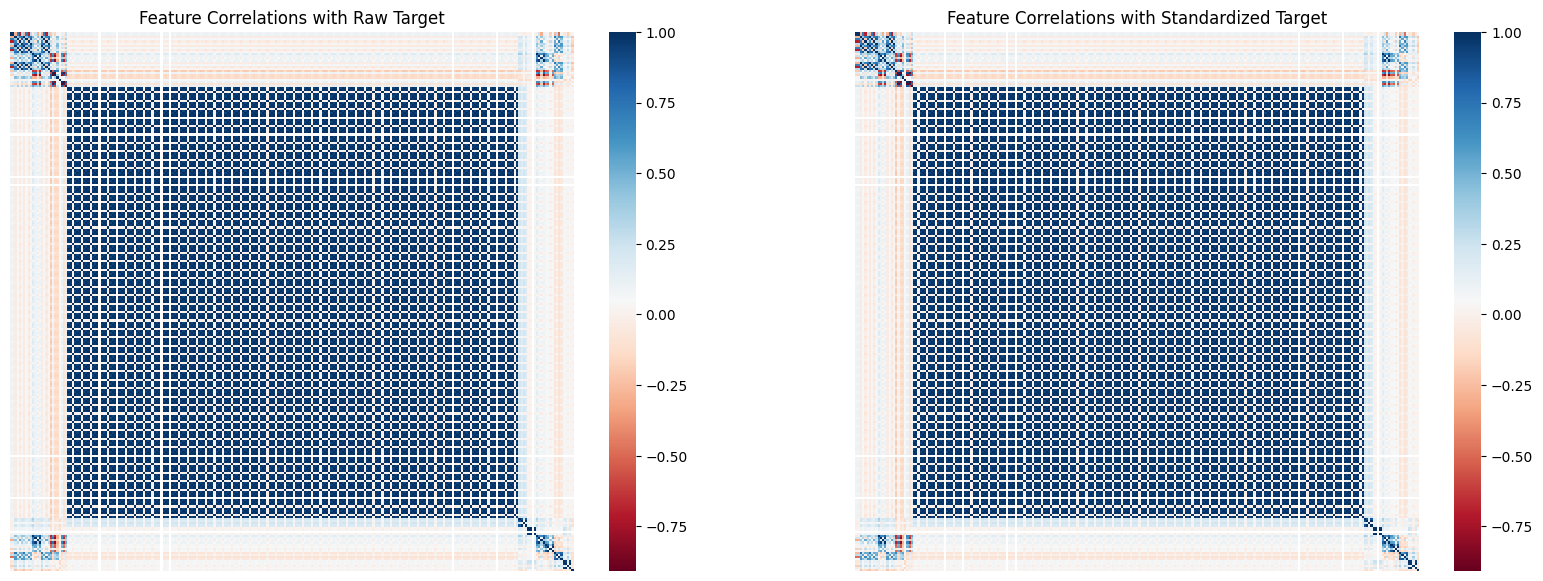

In [5]:
juries_model.viz_target()

In [6]:
juries_model.define_model()

In [7]:
juries_model.model_metrics(juries_model.baseline_model)

Model Metrics
R2: 0.2164	MAE: 0.9155	MSE: 1.2099	RMSE: 1.1


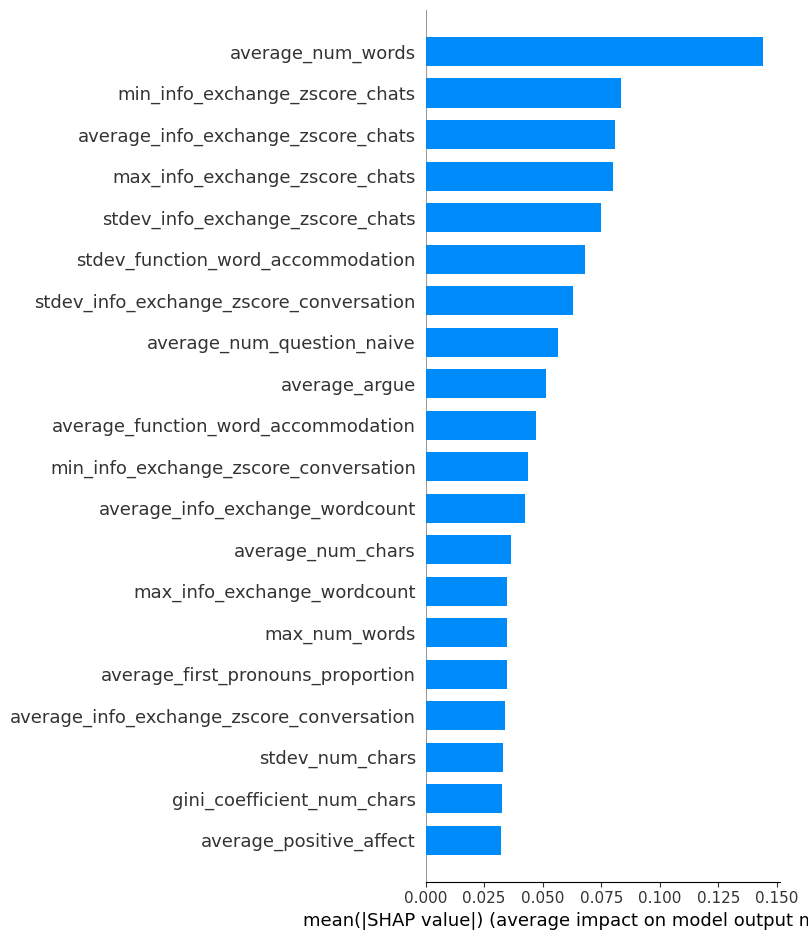

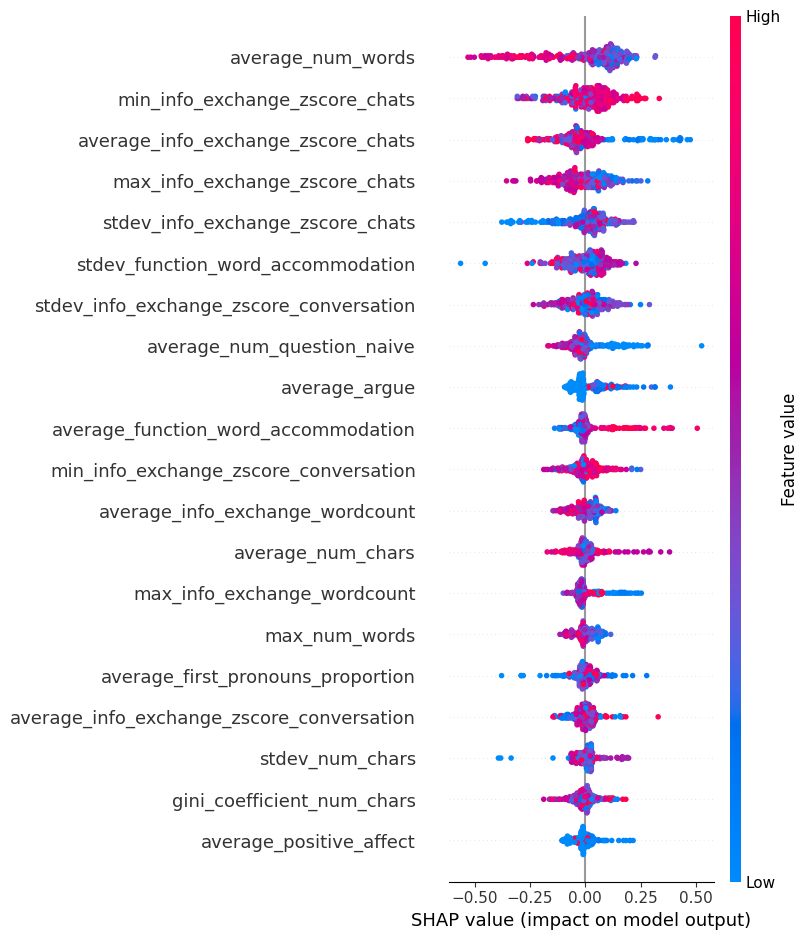

In [14]:
juries_model.model_diagnostics(juries_model.baseline_model)